In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()
from scipy.stats.stats import pearsonr
%matplotlib inline
from subprocess import check_output
import matplotlib
import sklearn.model_selection as ms
import sklearn
from sklearn.metrics import r2_score

In [2]:
train = pd.read_csv('WithLogsAndNewFeats.csv')
test = pd.read_csv('test.csv')

In [3]:
# make X and y for train test split
X = train.drop(columns = ['SalePrice'])
y = train["SalePrice"]
# X_te = test

In [4]:
# data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
# define functions
ridge = Ridge()
lasso = Lasso()
net = ElasticNet()

In [6]:
ridge.fit(X_train, y_train)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
abcd = pd.Series(ridge.coef_,index = X_train.columns)
# print(ridge.coef_)

the ridge intercept is: 7.79


In [7]:
# abcd.abs().sort_values(ascending = False)

In [8]:
alphas1 = np.linspace(1e-3, 200, 50)
gs = GridSearchCV(ridge, {"alpha" : alphas1}, cv = 5, iid = True, scoring = "neg_mean_squared_error")
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'alpha': array([1.00000e-03, 4.08261e+00, 8.16422e+00, 1.22458e+01, 1.63274e+01,
       2.04091e+01, 2.44907e+01, 2.85723e+01, 3.26539e+01, 3.67355e+01,
       4.08171e+01, 4.48987e+01, 4.89803e+01, 5.30620e+01, 5.71436e+01,
       6.12252e+01, 6.53068e+01, 6.93884e+01, 7.34700e+01, 7.75... 1.75510e+02, 1.79592e+02,
       1.83674e+02, 1.87755e+02, 1.91837e+02, 1.95918e+02, 2.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [9]:
# optimal alpha
gs.best_params_

{'alpha': 4.08261224489796}

In [10]:
# neg MSE
gs.best_score_

-0.015515487251138532

Text(0, 0.5, 'rmse')

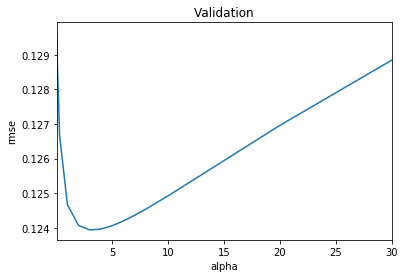

In [11]:
alphas = [0.05, 0.1, 0.3, 1, 2,3,4, 5,6,7,8, 10, 20, 30]
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [12]:
# calculate test error
ridge.set_params(alpha=4.08261224489796,normalize = False)
rmse = np.sqrt(-ms.cross_val_score(ridge,X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse.mean()

0.12396919173493275

In [13]:
# fit model
ridge.set_params(alpha = 4.08261224489796, normalize = False)
ridge.fit(X_train, y_train)

Ridge(alpha=4.08261224489796, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [14]:
# prediction on train
predict_train_rr = ridge.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,predict_train_rr)))
print(r2_score(y_train, predict_train_rr))

# prediction on test
predict_test_rr = ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,predict_test_rr)))
print(r2_score(y_test, predict_test_rr))

0.10693408744176182
0.9324633854448972
0.11090608697288137
0.908212332866209


In [15]:
cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)

array([-0.01876324, -0.0143635 , -0.01050301, -0.01750942, -0.01643826])

In [16]:
# pd.DataFrame(predict_train_rr).to_csv("sampsubmish.csv")

In [17]:
predict_train_rrr = ridge.predict(X)

In [18]:
# pd.DataFrame(predict_train_rrr).to_csv("sampsubmish.csv")